# Introduction
In this notebook, we will do the following::
1. Split data into train and test set
2. Import models from sklearn and instantiate them
3. Fit training data into the model and train
4. Make a set of predictions using train data, and
5. Compare predictions with ground truth in test data
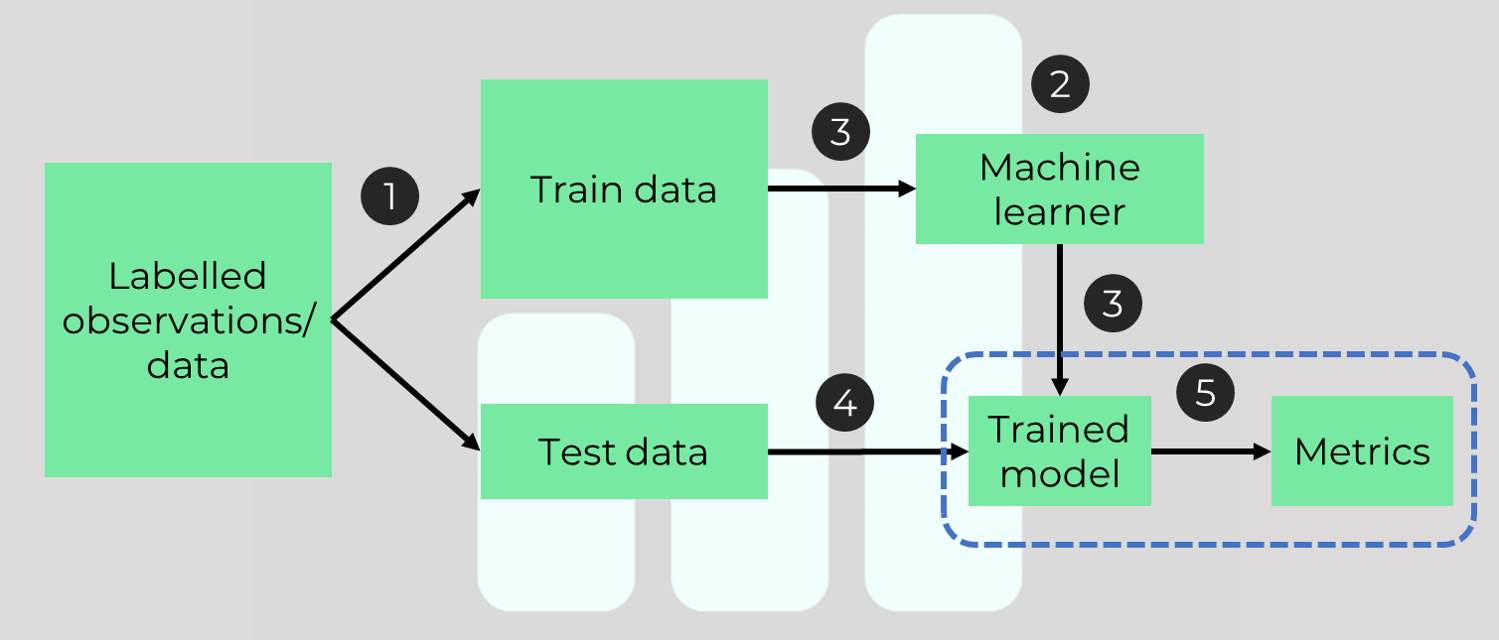

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load CSV
df1 = pd.read_csv('part4_result.csv')
df1.sample(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,Dummy_MULTI GENERATION.1,Dummy_NEW GENERATION,Dummy_PREMIUM APARTMENT,Dummy_PREMIUM APARTMENT LOFT,Dummy_PREMIUM MAISONETTE,Dummy_SIMPLIFIED,Dummy_STANDARD,Dummy_TERRACE,Dummy_TYPE S1,Dummy_TYPE S2
251797,1999-05,BEDOK,4 ROOM,512,BEDOK NTH AVE 2,07 TO 09,92.0,NEW GENERATION,1979,225000.0,...,0,1,0,0,0,0,0,0,0,0
474092,2005-08,TAMPINES,4 ROOM,116,SIMEI ST 1,01 TO 03,104.0,MODEL A,1988,245000.0,...,0,0,0,0,0,0,0,0,0,0
139554,1996-10,KALLANG/WHAMPOA,3 ROOM,23,BENDEMEER RD,04 TO 06,78.0,IMPROVED,1972,220000.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Check dataset columns
df1.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'year', 'real_month', 'remaining_lease', 'Dummy_2 ROOM', 'Dummy_3 ROOM',
       'Dummy_4 ROOM', 'Dummy_5 ROOM', 'Dummy_EXECUTIVE',
       'Dummy_MULTI GENERATION', 'Dummy_BEDOK', 'Dummy_BISHAN',
       'Dummy_BUKIT BATOK', 'Dummy_BUKIT MERAH', 'Dummy_BUKIT PANJANG',
       'Dummy_BUKIT TIMAH', 'Dummy_CENTRAL AREA', 'Dummy_CHOA CHU KANG',
       'Dummy_CLEMENTI', 'Dummy_GEYLANG', 'Dummy_HOUGANG', 'Dummy_JURONG EAST',
       'Dummy_JURONG WEST', 'Dummy_KALLANG/WHAMPOA', 'Dummy_LIM CHU KANG',
       'Dummy_MARINE PARADE', 'Dummy_PASIR RIS', 'Dummy_PUNGGOL',
       'Dummy_QUEENSTOWN', 'Dummy_SEMBAWANG', 'Dummy_SENGKANG',
       'Dummy_SERANGOON', 'Dummy_TAMPINES', 'Dummy_TOA PAYOH',
       'Dummy_WOODLANDS', 'Dummy_YISHUN', 'Dummy_ADJOINED FLAT',
       'Dummy_APARTMENT', 'Dummy_DBSS', 'Dummy_IMPROVED',
       'Dummy_IMPROVED-MAIS

In [7]:
# Step 3: Drop columns that are not needed
df2 = df1.drop(['month','town','flat_type','flat_model','block','street_name','storey_range'],axis=1)
df2.columns

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price', 'year',
       'real_month', 'remaining_lease', 'Dummy_2 ROOM', 'Dummy_3 ROOM',
       'Dummy_4 ROOM', 'Dummy_5 ROOM', 'Dummy_EXECUTIVE',
       'Dummy_MULTI GENERATION', 'Dummy_BEDOK', 'Dummy_BISHAN',
       'Dummy_BUKIT BATOK', 'Dummy_BUKIT MERAH', 'Dummy_BUKIT PANJANG',
       'Dummy_BUKIT TIMAH', 'Dummy_CENTRAL AREA', 'Dummy_CHOA CHU KANG',
       'Dummy_CLEMENTI', 'Dummy_GEYLANG', 'Dummy_HOUGANG', 'Dummy_JURONG EAST',
       'Dummy_JURONG WEST', 'Dummy_KALLANG/WHAMPOA', 'Dummy_LIM CHU KANG',
       'Dummy_MARINE PARADE', 'Dummy_PASIR RIS', 'Dummy_PUNGGOL',
       'Dummy_QUEENSTOWN', 'Dummy_SEMBAWANG', 'Dummy_SENGKANG',
       'Dummy_SERANGOON', 'Dummy_TAMPINES', 'Dummy_TOA PAYOH',
       'Dummy_WOODLANDS', 'Dummy_YISHUN', 'Dummy_ADJOINED FLAT',
       'Dummy_APARTMENT', 'Dummy_DBSS', 'Dummy_IMPROVED',
       'Dummy_IMPROVED-MAISONETTE', 'Dummy_MAISONETTE', 'Dummy_MODEL A',
       'Dummy_MODEL A-MAISONETTE', 'Dummy_MOD

### Step 4: Prepare your independent and dependent variables
Once you're done with the final dataset, time to prepare them once more. We'll be preparing a DataFrame containing our indepedent variables, and a separate list containing the "resale_price".

1. Declare a variable, and assign your independent variables to it, i.e. drop "resale_price" from the DataFrame from Step 3
2. Declare a variable, and assign only values from "resale_price"

In [8]:
# Prepare ind_var DataFrame with independent variables
ind_var = df2.drop('resale_price',axis=1)
# Prepare dpd_var DataFrame with dependent variable i.e. resale_price
dpd_var = df2['resale_price']

In [10]:
ind_var.columns
dpd_var.head(2)

0    9000.0
1    6000.0
Name: resale_price, dtype: float64

In [11]:
# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [12]:
# Split data into train and test via 80/20 rule
x_train, x_test, y_train, y_test = train_test_split(ind_var, dpd_var, test_size=0.2)

### Step 7: Train your machine learning model
Once you've split your data, machine learning begins. 

This is what you'll need to do:
1. Start with a model
2. Declare a variable, and store your model in it (don't forget to use brackets)
3. Fit your training data into the instantiated model
4. Declare a variable that contains predictions from the model you just trained, using the train dataset (X_test)

We recommend starting with Dummyregressor to establish a baseline for your predictions. 

Also, the recommended readings will be very helpful.

In [18]:
# Establish baseline using DummyRegressor model
# Declare a variable to store the model
model1 = DummyRegressor()
# Fit model with train dataset
model1.fit(x_train, y_train)
# Declare a variable and store model predictions with test data
predict1 = model1.predict(x_test)
# Declare a variable to store expected results
expect = y_test

In [14]:
# Train a LinearRegression model
model2 = LinearRegression()
model2.fit(x_train, y_train)
predict2 = model2.predict(x_test)

In [15]:
# Train a DecisionTreeRegressor model
model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train)
predict3 = model3.predict(x_test)

In [39]:
# Train a RandomForestRegressor model
model4 = RandomForestRegressor()
model4.fit(x_train, y_train)
predict4 = model4.predict(x_test)

C:\Users\tianweizheng\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Assess model performance
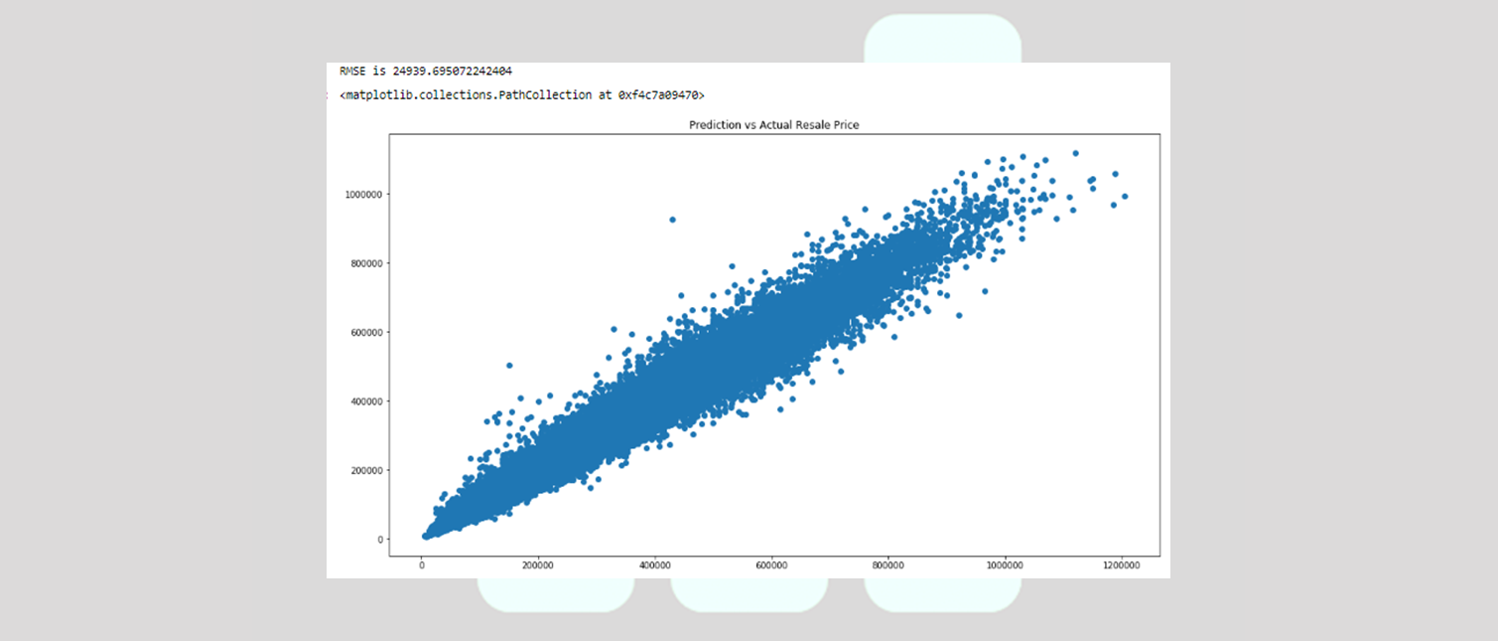

RMSE for DummyRegressor is 149135.18932047414


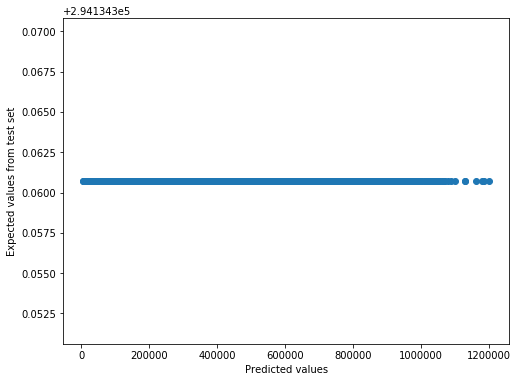

In [25]:
# DummyRegresssor model
# Print the RMSE between the y test and the prediction
rmse1 = np.sqrt(np.mean((predict1 - expect)**2))
print('RMSE for DummyRegressor is {}'.format(rmse1))

# Plot a scatter plot test dependent variables vs predictions
plt.figure(figsize=(8,6))
plt.scatter(expect,predict1)
plt.xlabel('Predicted values')
plt.ylabel('Expected values from test set')
plt.show()

RMSE for LinearRegressor is 66508.04670385866


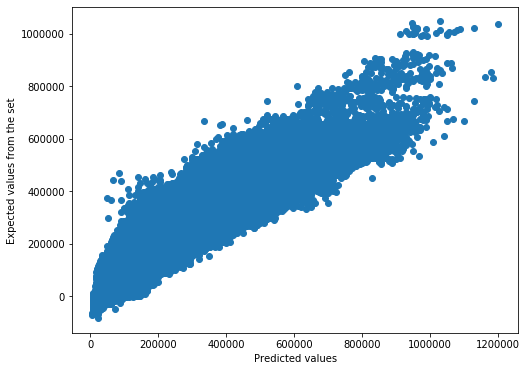

In [26]:
# LinearRegresssor model
rmse2 = np.sqrt(np.mean((predict2 - expect)**2))
print('RMSE for LinearRegressor is {}'.format(rmse2))

plt.figure(figsize=(8,6))
plt.scatter(expect, predict2)
plt.xlabel('Predicted values')
plt.ylabel('Expected values from the set')
plt.show()

RMSE for DecisionTreeRegister is 30002.841929231698


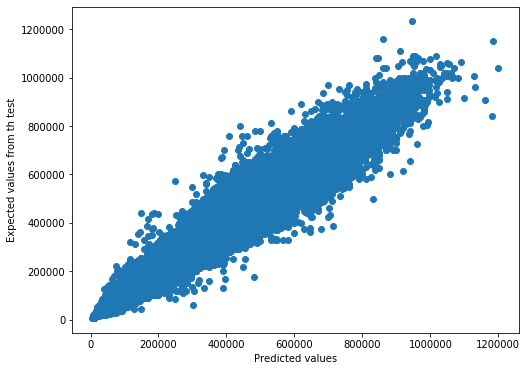

In [37]:
# DecisionTreeRegresssor model
rmse3 = np.sqrt(np.mean((predict3 - expect)**2))
print('RMSE for DecisionTreeRegister is {}'.format(rmse3))

plt.figure(figsize = (8,6))
plt.scatter(expect, predict3)
plt.xlabel('Predicted values')
plt.ylabel('Expected values from th test')
plt.show()

RMSE for RandomForestRegressor is 25755.431560407378


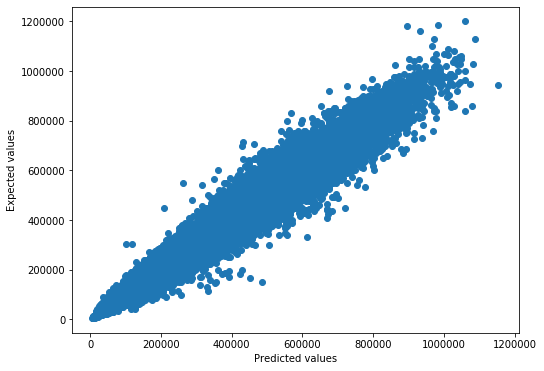

In [40]:
# RandomForestRegresssor model
rmse4 = np.sqrt(np.mean((predict4 - expect)**2))
print('RMSE for RandomForestRegressor is {}'.format(rmse4))

plt.figure(figsize = (8,6))
plt.scatter(predict4, expect)
plt.xlabel('Predicted values')
plt.ylabel('Expected values')
plt.show()

### Get the feature importance of each of feature in the best model i.e. RandomForestRegressor

In [ ]:
# Get a list containing the columns in the train dataframe

# Get the feature importances from the model

# Declare a variable containing a new DataFrame from above

# Sort new DataFrame by the importance score